## Problem Statement

### According to our dataset, which feature does affect the E-commerce Shipping Delivery on time the most?

## Initial Setup

First, install the imbalanced-learn module and xgboost module that is necessary for our data preprocessing and modelling XGBoost.

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.7 MB 6.8 MB/s eta 0:00:15
   ---------------------------------------- 0.7/99.7 MB 8.5 MB/s eta 0:00:12
   ---------------------------------------- 0.7/99.7 MB 7.6 MB/s eta 0:00:13
   ---------------------------------------- 1.1/99.7 MB 6.3 MB/s eta 0:00:16
   ---------------------------------------- 1.2/99.7 MB 5.5 MB/s eta 0:00:19
    --------------------------------------- 1.4/99.7 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.7/99.7 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 1.9/99.7 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 2.1/99.7 MB 5.1 MB/s eta 0:00:20
    ----------------------------


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importing Necessary Libraries

# For an Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing (target variable)
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# For Modelling
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
import xgboost as xgb   # XGBoost
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) Classifier

# For Evaluations
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For Feature Importance
from sklearn.inspection import permutation_importance

%matplotlib inline

In [7]:
# Load data from the certain csv file, and create a DataFrame df with the data
df = pd.read_csv("ITS65704_GroupAsgn_Sec02.csv")

## Exploratory Data Analysis

### Initial EDA

In [8]:
# Extract first five observations from the dataset
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
# Represents, column names, number of non-null values, and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
# Represents the statistical summaries of the dataset
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
# Represents the size of dataset matrix (rows, columns)
df.shape

(10999, 12)

In [12]:
# Count each value existing in "Warehouse_block"
df["Warehouse_block"].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [13]:
# Count each value existing in "Mode_of_Shipment"
df["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [14]:
# Count each value existing in "Product_importance"
df["Product_importance"].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [15]:
# Count each value existing in "Gender"
df["Gender"].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [16]:
# Describe categorical columns' statistical summaries
df.select_dtypes(include = "object").describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [17]:
# Confirm the max count of missing values on columns
df.isna().sum().max()

0

In [18]:
# Calculates the number of each value in "Class" column
print('Delayed', round(df['Reached.on.Time_Y.N'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Reached on Time', round(df['Reached.on.Time_Y.N'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Delayed 40.33 % of the dataset
Reached on Time 59.67 % of the dataset


The values in target variable are imbalanced
</br> -> we will perform resampling for the variable.

### Descriptive EDA

#### Numerical Features Visualization

In [19]:
# Extract numerical features from the DataFrame
numeric_columns = df.select_dtypes(include = ["int64", "float64"])

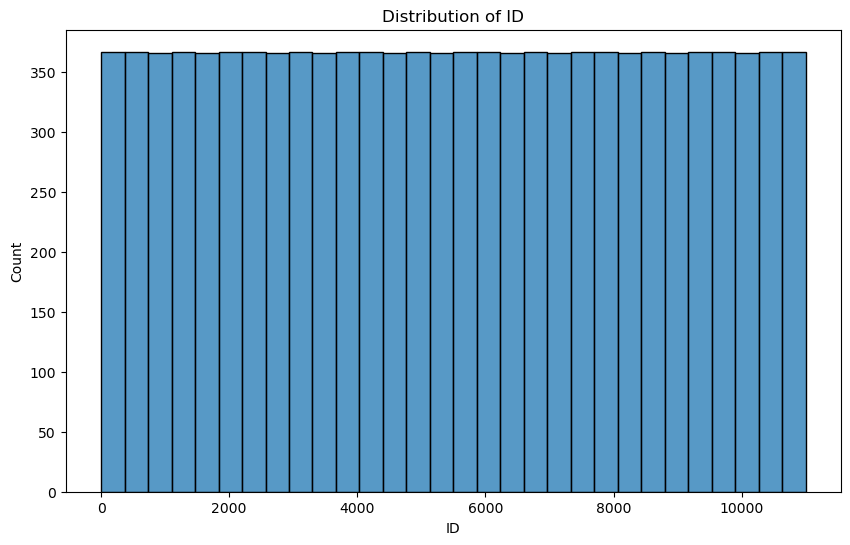

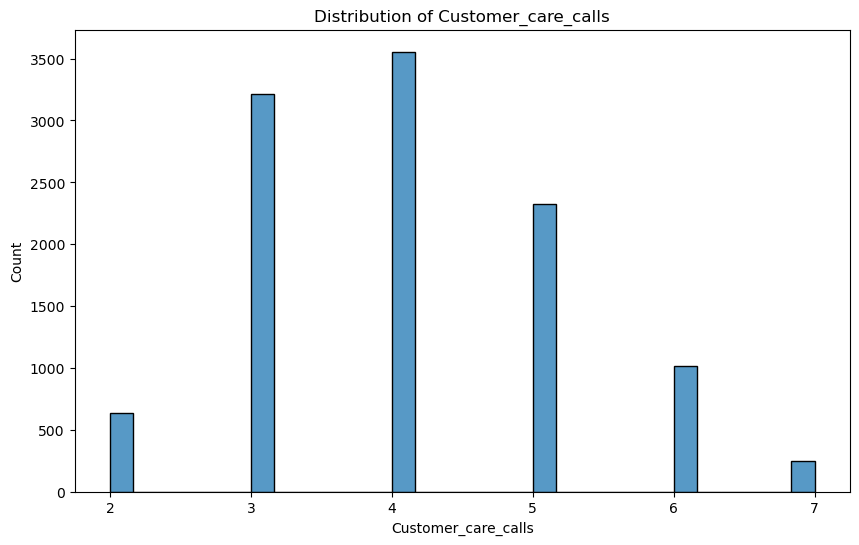

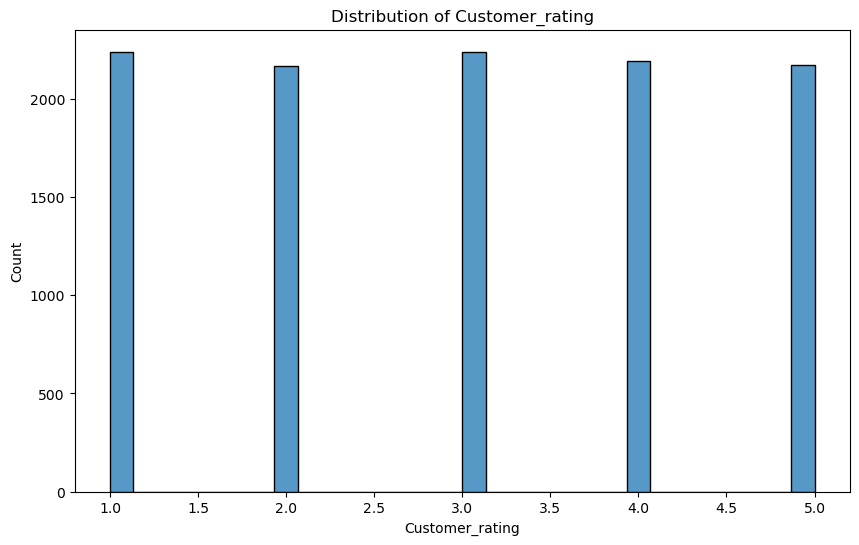

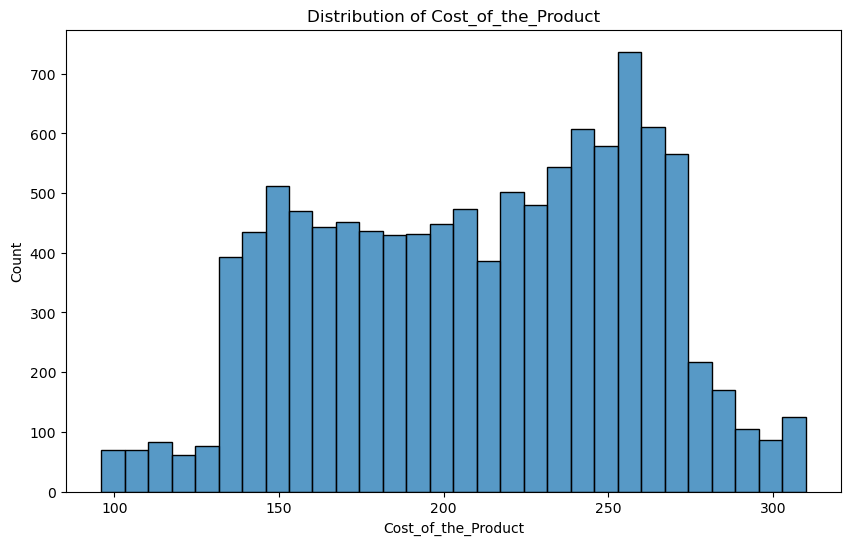

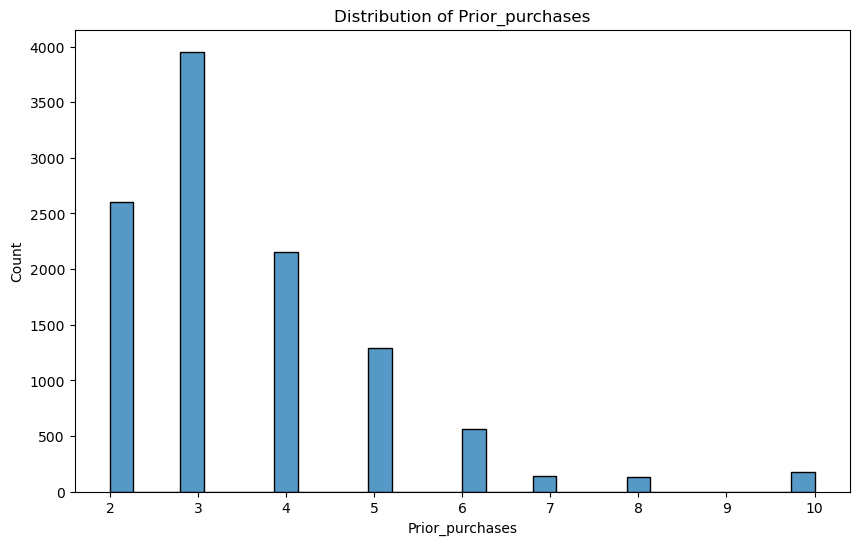

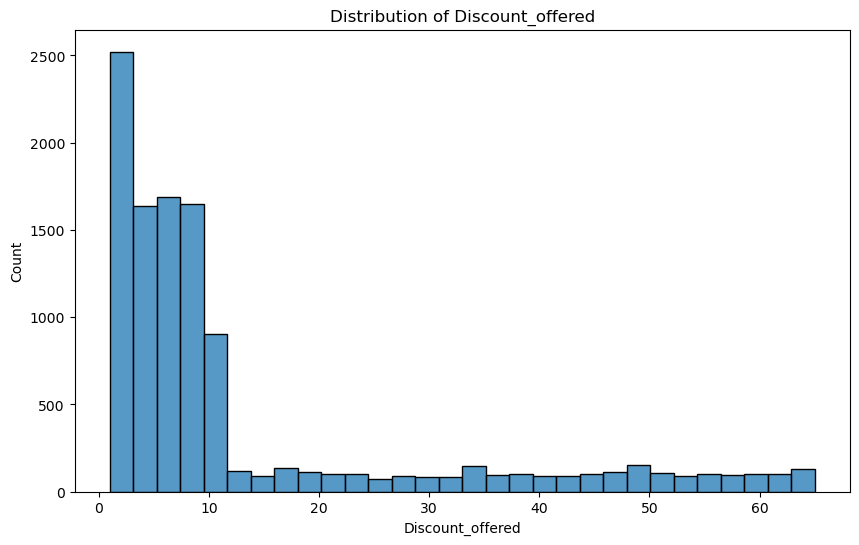

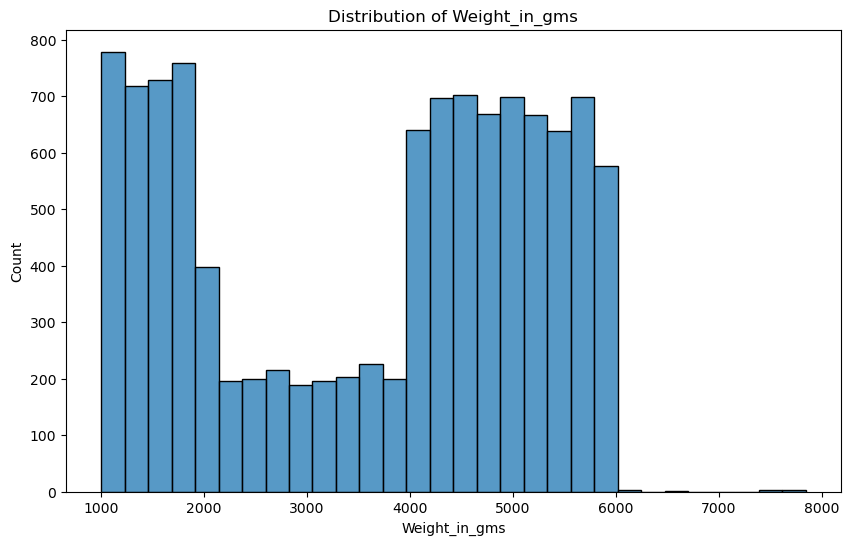

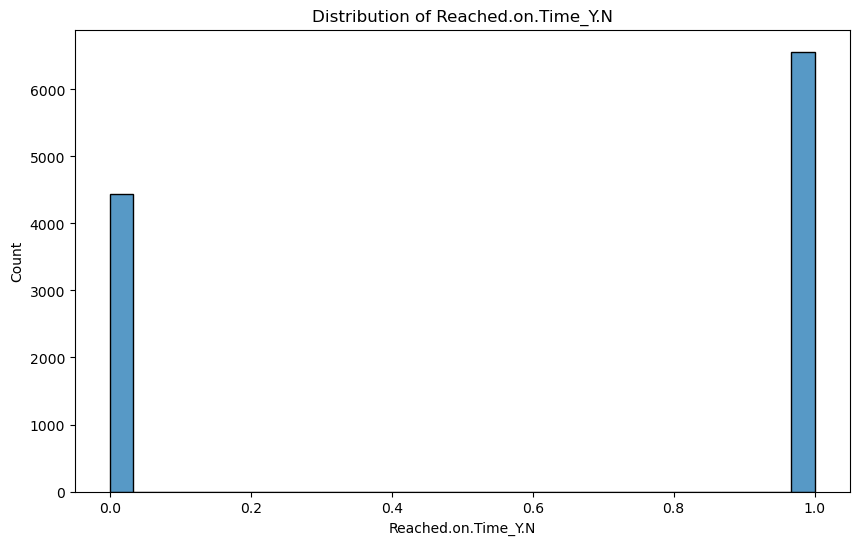

In [20]:
# Histogram for each numerical feature
for nu_column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[nu_column], kde=False, bins=30)
    plt.title(f'Distribution of {nu_column}')
    plt.show()

The numerical variables seemed heavily imbalanced.

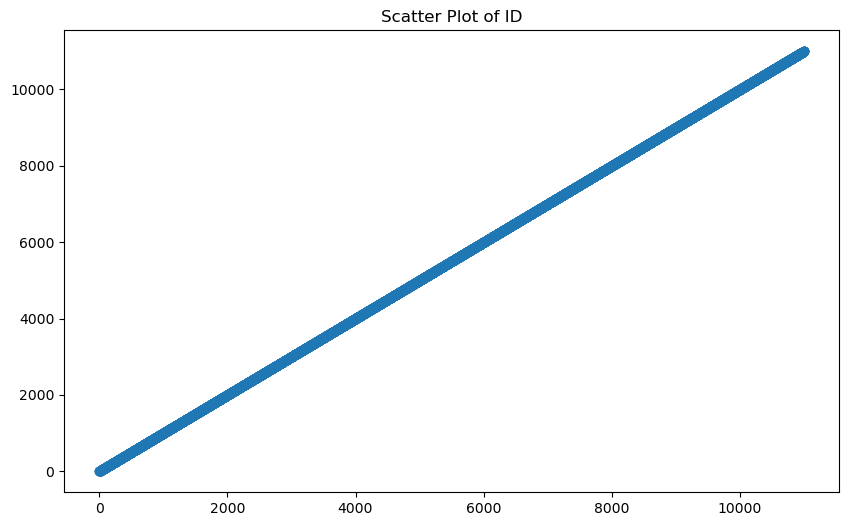

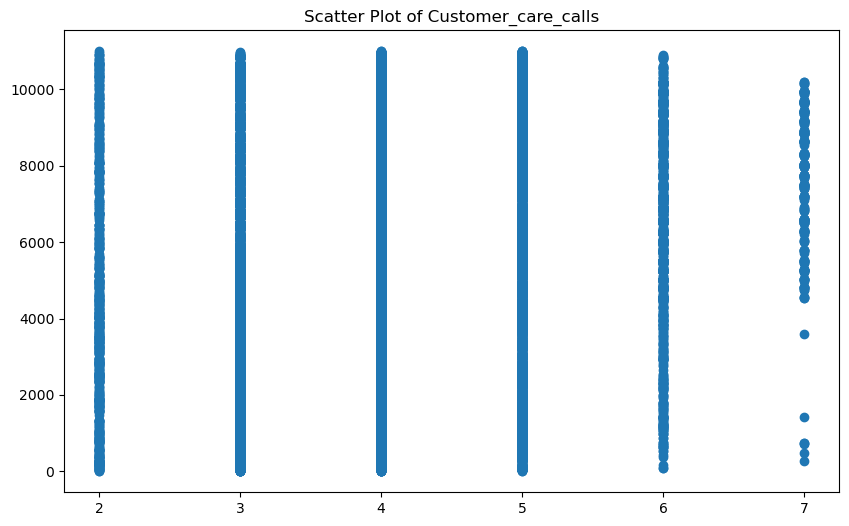

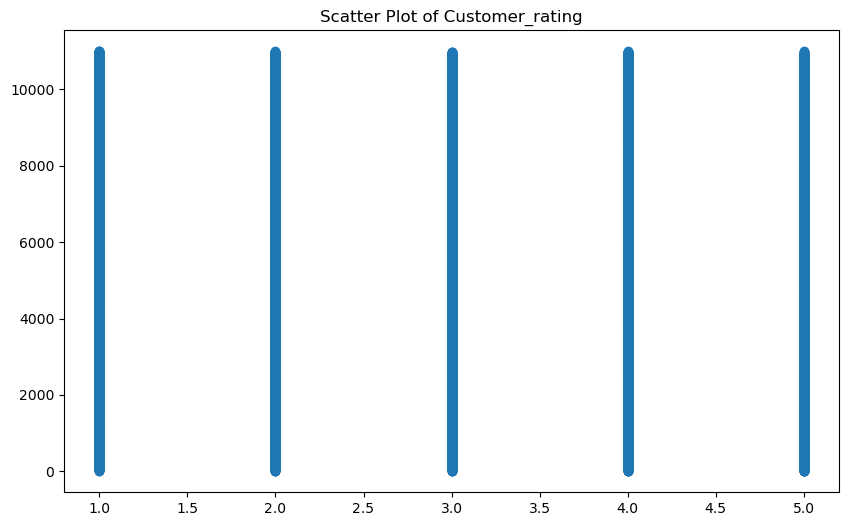

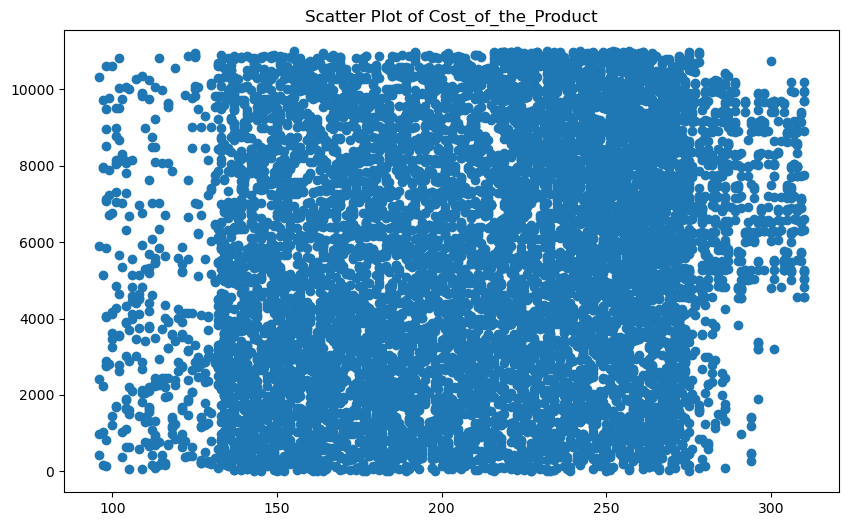

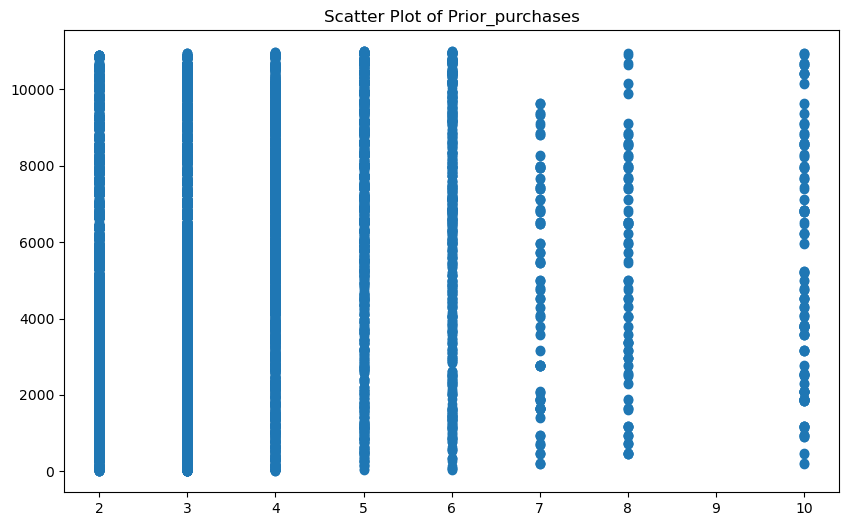

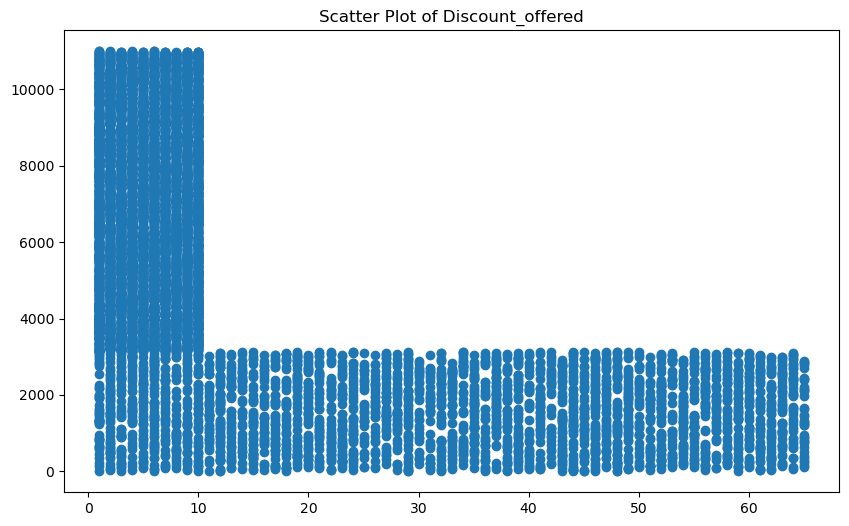

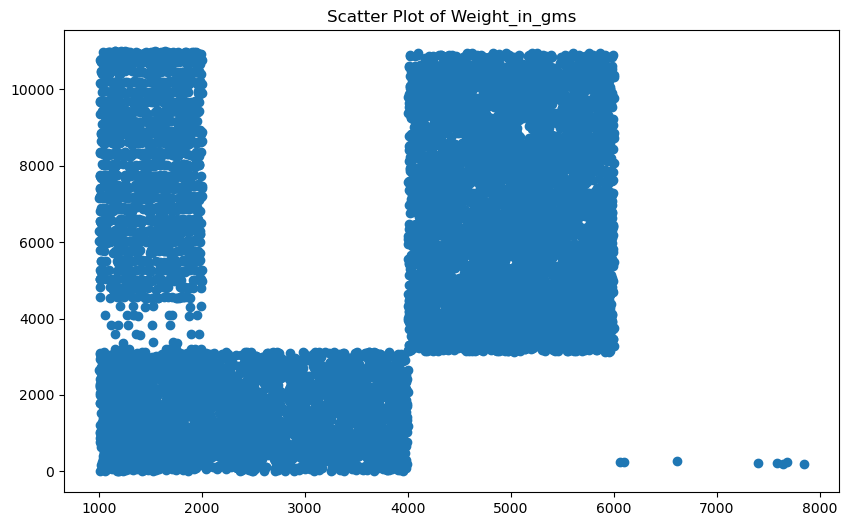

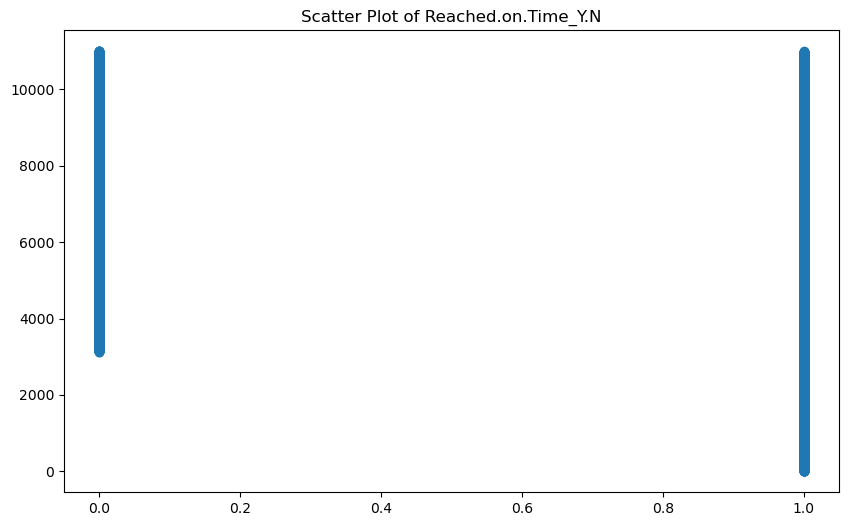

In [21]:
# Scatter Plot for each numerical feature
for nu_column in numeric_columns:
    plt.figure(figsize=(10,6))
    plt.scatter(df[nu_column], np.arange(len(df[nu_column])))
    plt.title(f'Scatter Plot of {nu_column}')
    plt.show()

C:\Users\ihsa2\AppData\Local\Temp\ipykernel_11952\3379445109.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


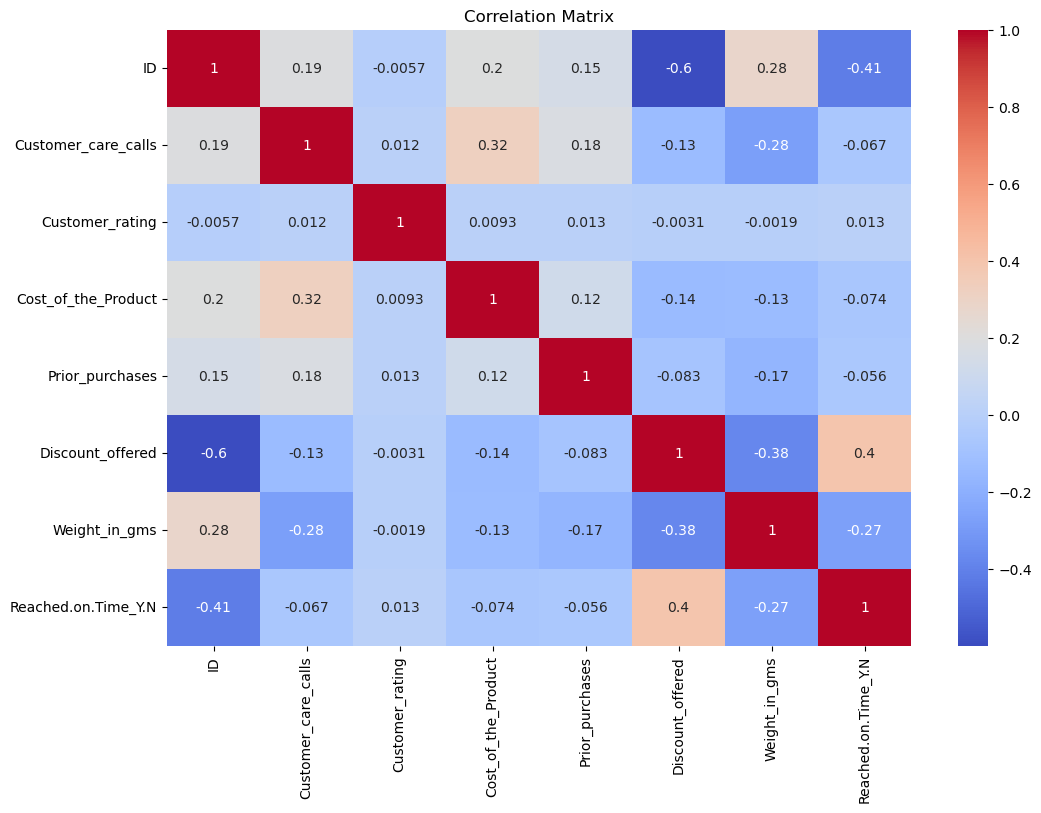

In [22]:
# Correlation Matrix Heatmap (before encoding)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix seems not having a high multicollinearity, because there aren't so much high correlations among variables.

<Figure size 1200x800 with 0 Axes>

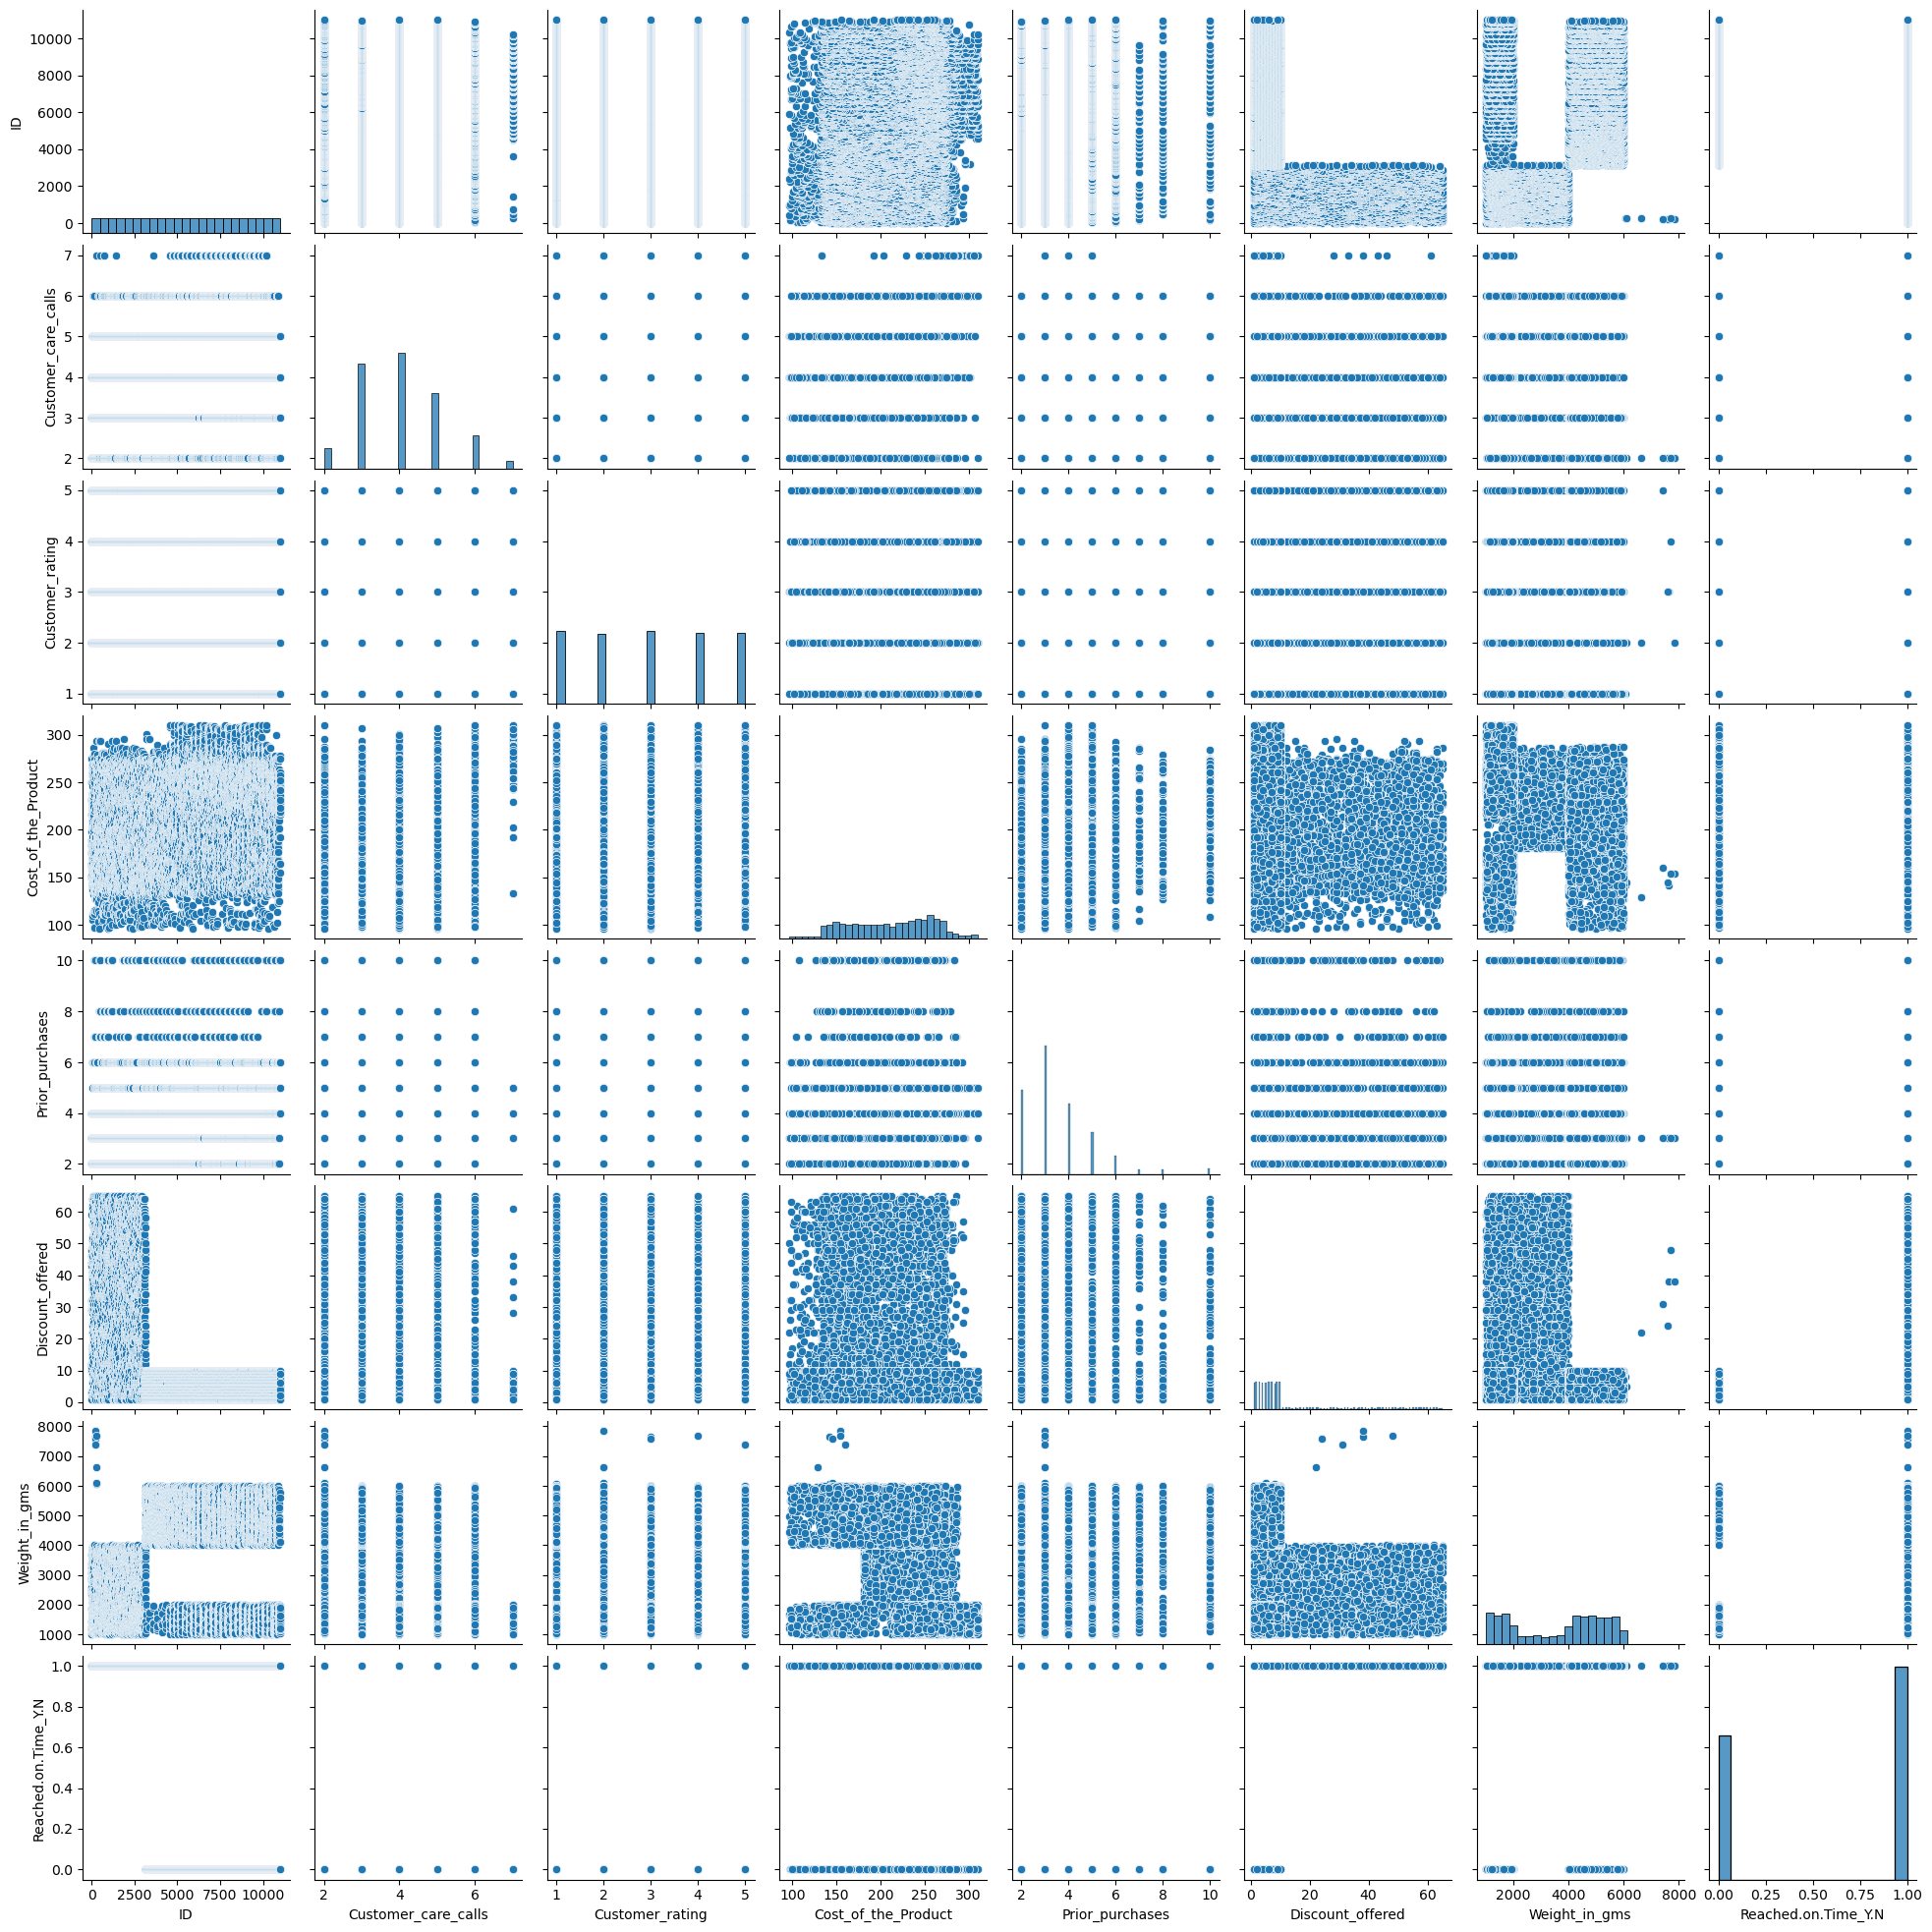

In [23]:
# Seaborn Pairplot
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

According to the "Reached.on.Time_Y.N" column plots in the pairplot, we could confirm that the variable seems to be categorical.
</br> -> we should use ***classification*** ML algorithms for prediction.
</br>    (e.g.) Logistic Regression, Decision Tree, Random Forest, etc.

#### Categorical Features Visualization

In [24]:
# Extract categorical features from the DataFrame
categorical_columns = df.select_dtypes(include = "object")

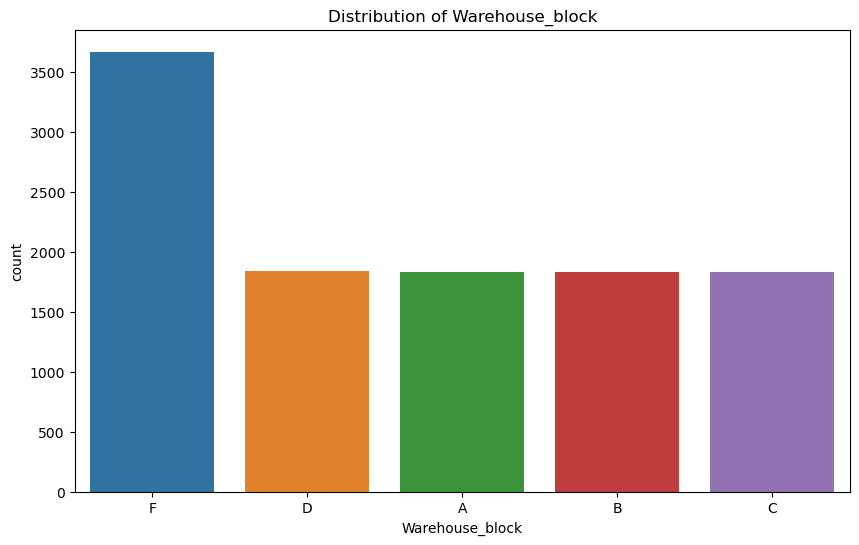

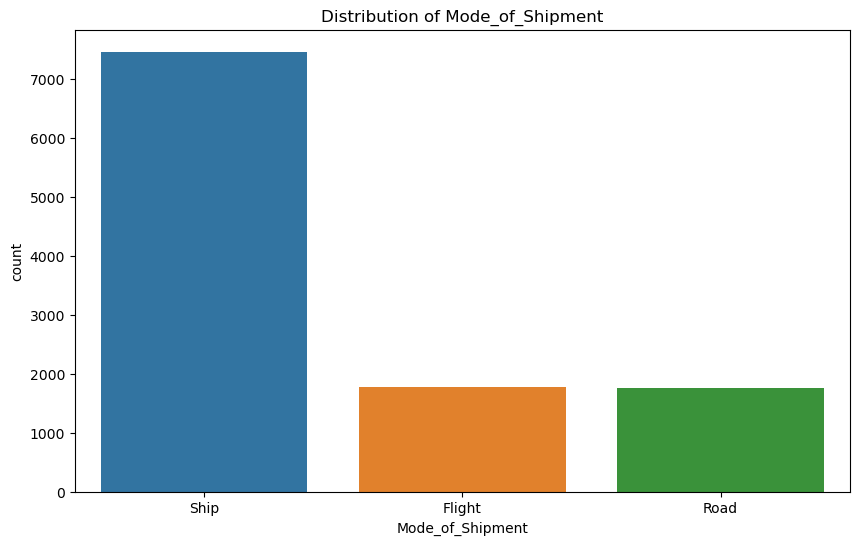

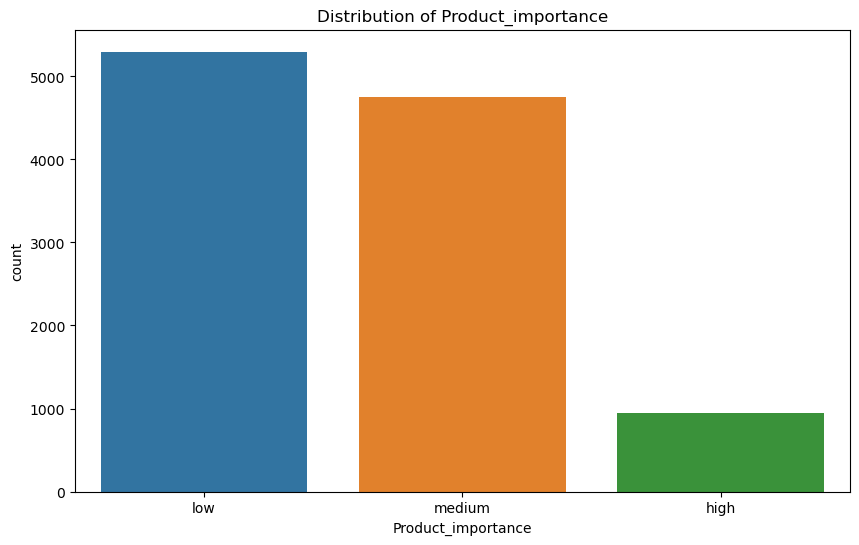

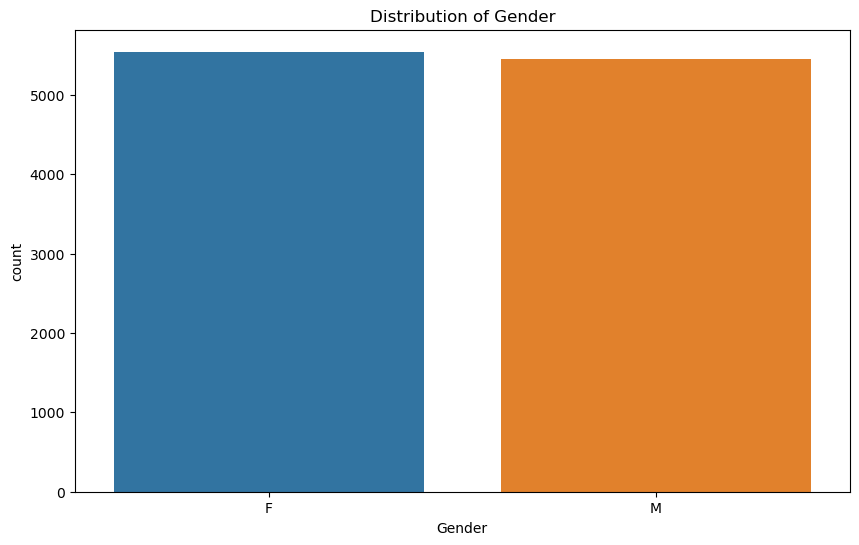

In [25]:
# Bar Chart for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

### Data Preprocessing - Label Encoding

This is the pre-processing work to convert categorical data into numerical data.

In [26]:
# Create an instance of LabelEncoder Class
le = LabelEncoder()

In [27]:
df["Warehouse_block"] = le.fit_transform(df["Warehouse_block"].fillna('Unknown'))
df["Mode_of_Shipment"] = le.fit_transform(df["Mode_of_Shipment"].fillna('Unknown'))
df["Product_importance"] = le.fit_transform(df["Product_importance"].fillna('Unknown'))
df["Gender"] = le.fit_transform(df["Gender"].fillna('Unknown'))

In [28]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int32
 2   Mode_of_Shipment     10999 non-null  int32
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int32
 8   Gender               10999 non-null  int32
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int32(4), int64(8)
memory usage: 859.4 KB


In [30]:
df.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691
std,3175.28214,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


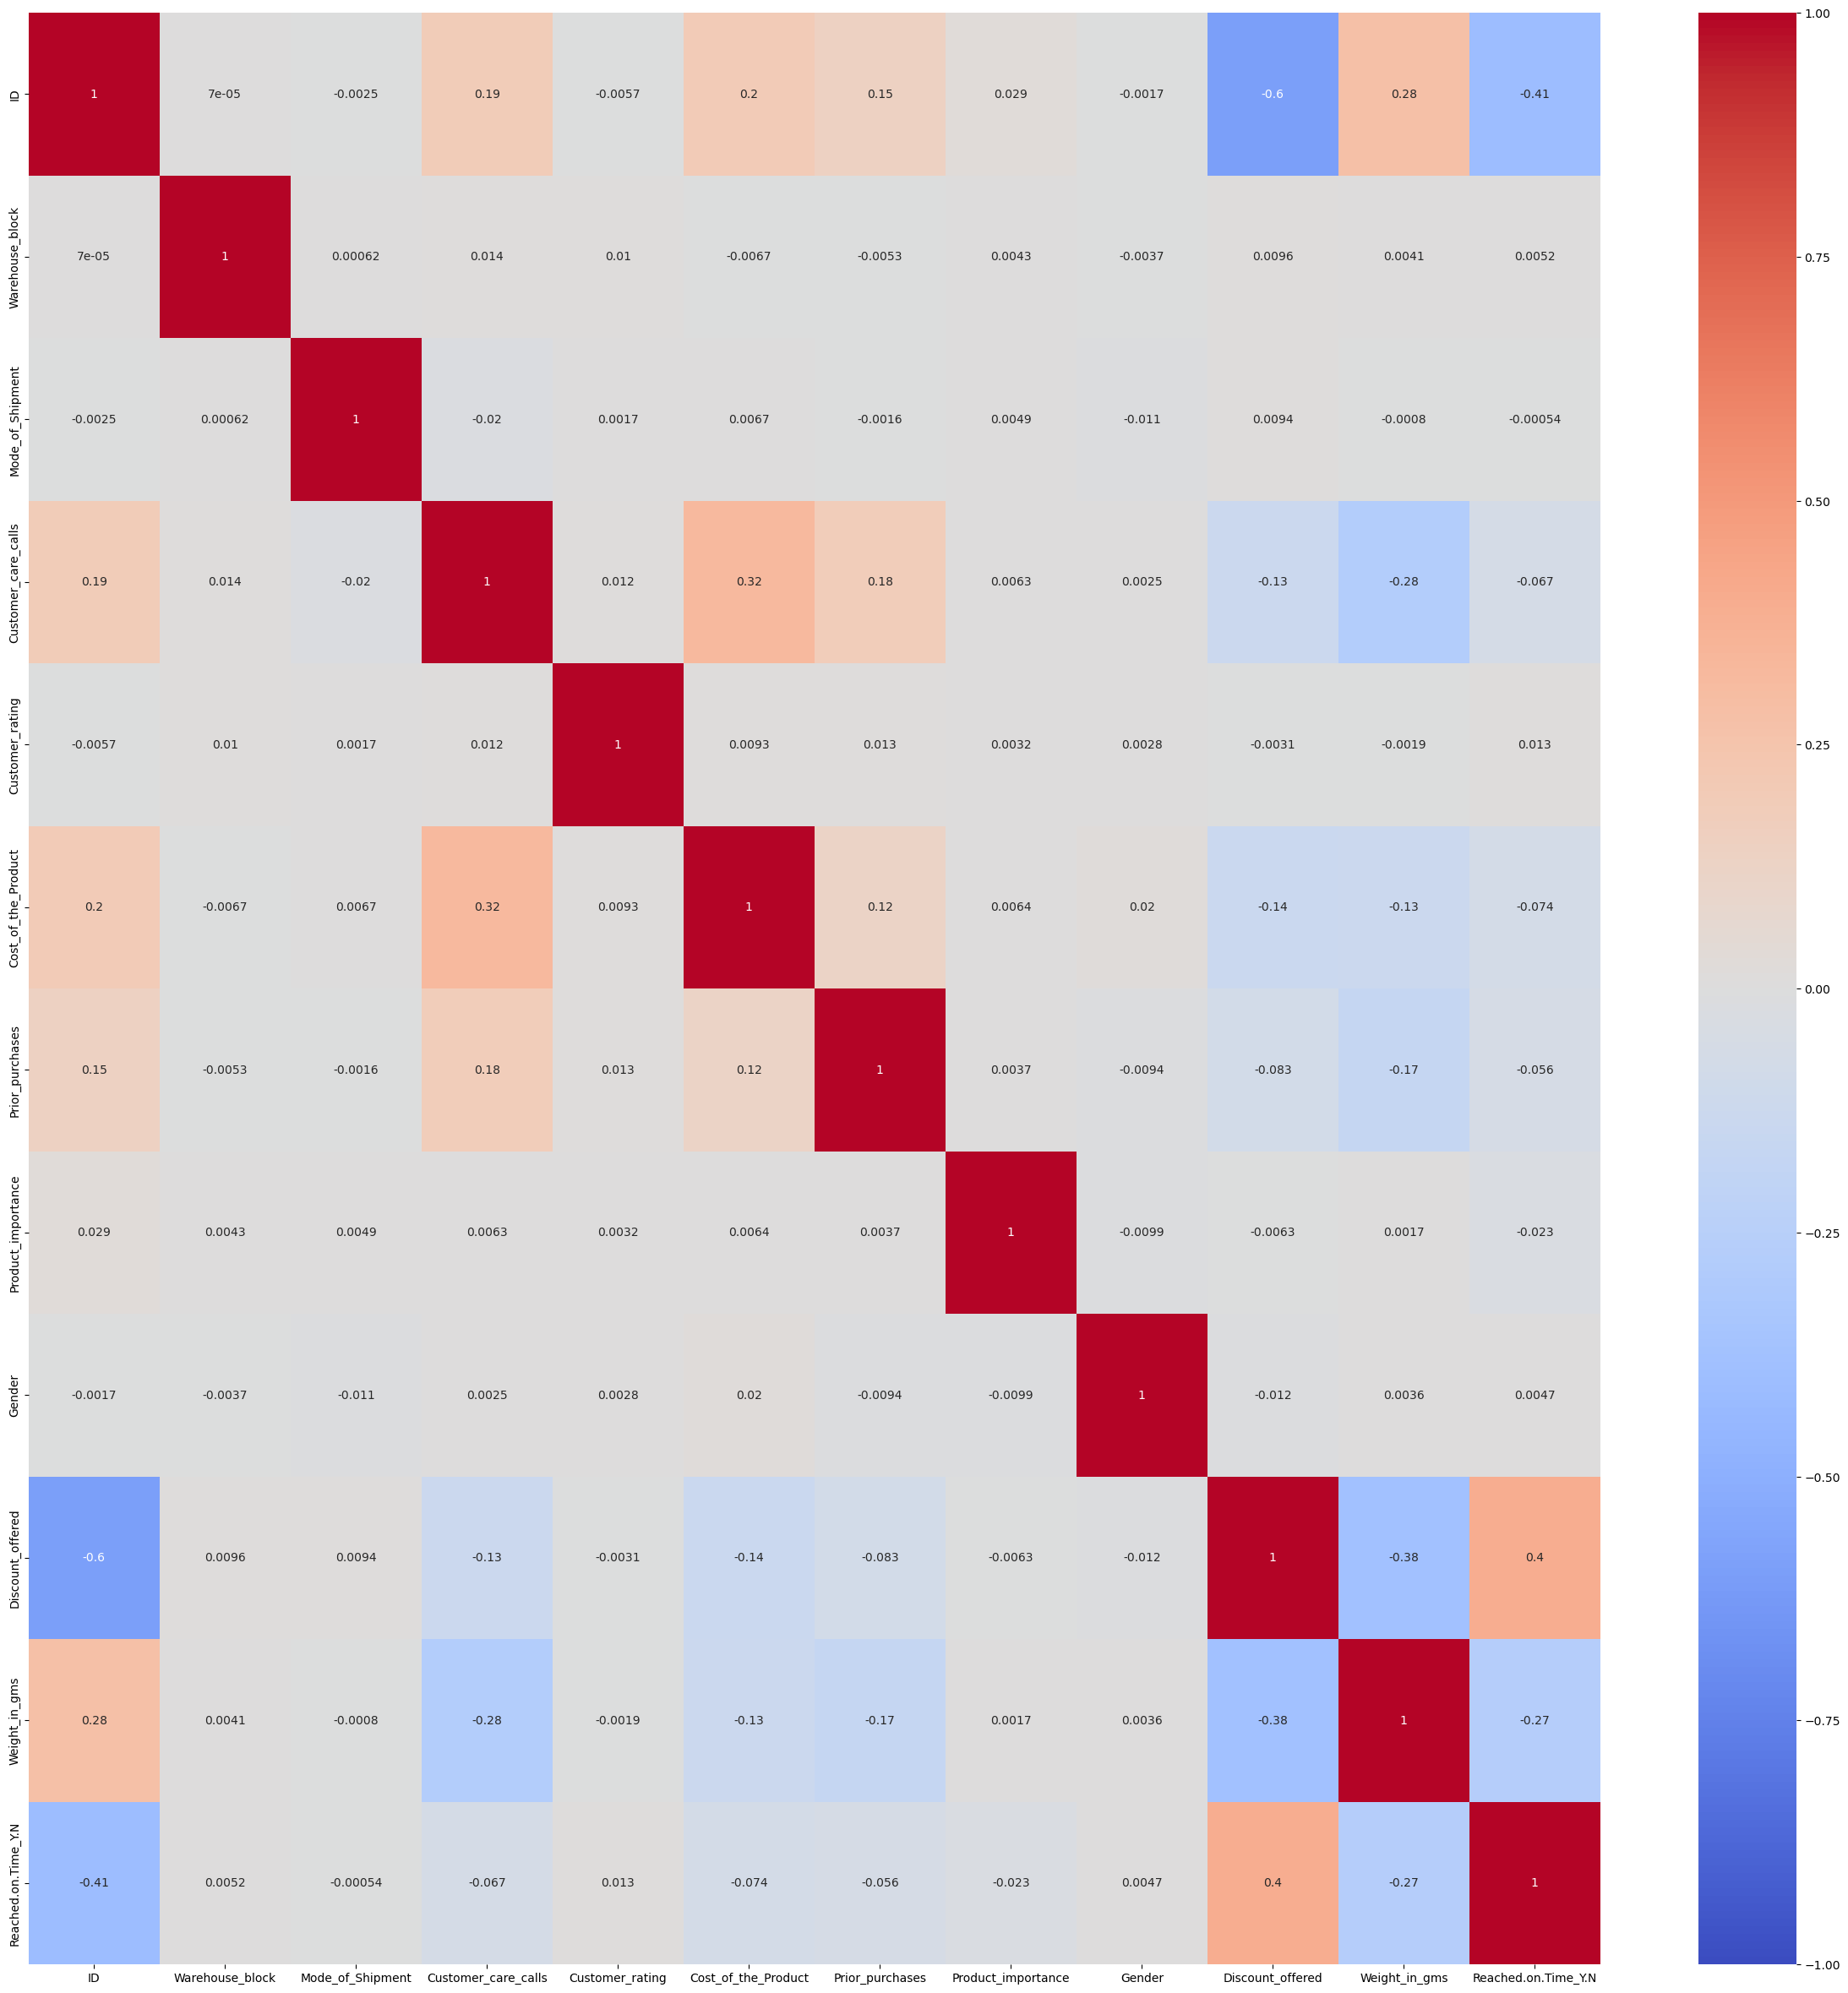

In [31]:
# Correlation Matrix Heatmap (Based on label-encoded data)
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.show()

According to the correlation matrix (with an encoded data), below are the features we have considered including or excluding for modeling:
</br>

[ Include ]

- **Discount_offered**: It has a notable negative correlation (-0.38) with Reached.on.Time_Y.N, which is significant.
- **Weight_in_gms**: A negative correlation of -0.27 with Reached.on.Time_Y.N is also significant.
</br>

[ Possibly Exclude ]

- **ID**: It is a feature for identifying each observation, so would be excluded.
- **Gender**: Its correlation with Reached.on.Time_Y.N is relatively low (0.0047).
- **Warehouse_Block**: Again, the correlation with the target variable is low (0.0052).
- **Prior_purchases**: The correlation is not strong enough (0.0087) to indicate a strong linear relationship.
- **Customer_care_calls**: The correlation is not very strong (0.0094).
- **Mode_of_Shipment**: Shows relatively low correlation (-0.00054) with Reached.on.Time_Y.N.
- **Product_importance**: Has a correlation of -0.023 with Reached.on.Time_Y.N, it's not as strong as some others.
- **Cost_of_the_Product**: This has a correlation of -0.074 with the target, which is not worth considering.
- **Customer_rating**: Since the correlation is low (0.013), it is not worth including.

Therefore, we will perform Data Wrangling by excluding above 9 features that are "Possibly Exclude" from the features for modeling, in next step.

## Modelling

### Split data into Features and Target, create Train and Test set

In [62]:
# creating features and target
X = df[["Discount_offered", "Weight_in_gms"]]
y = df["Reached.on.Time_Y.N"]

Besides the features and target without resampling by ADASYN, we would create another features and target "X_resampled" and "y_resampled".

In [63]:
# Instantiate ADASYN
adasyn = ADASYN()

# Resample the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [64]:
# Splitting the data into training and testing data sets
X_sampled_train, X_sampled_test, y_sampled_train, y_sampled_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
# Scaling the data using StandardScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_sampled_train = sc.fit_transform(X_sampled_train)
X_sampled_test = sc.fit_transform(X_sampled_test)

### Logistic Regression

#### Without Resampling

In [105]:
# Initializing the Logistic Regression model
LR = LogisticRegression()

# Fitting the model with training data
LR.fit(X_train, y_train)

LogisticRegression()

In [106]:
# Making predictions on the train and test data
lr_train_preds = LR.predict(X_train)
lr_test_preds = LR.predict(X_test)

In [107]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_train, lr_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_train, lr_train_preds), 4)
r2 = round(r2_score(y_train, lr_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.369
 Root Mean Squared Error: 0.6075
 Mean Absolute Error: 0.369
 R-squared: -0.5345
*================================*


In [108]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_test, lr_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, lr_test_preds), 4)
r2 = round(r2_score(y_test, lr_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3682
 Root Mean Squared Error: 0.6068
 Mean Absolute Error: 0.3682
 R-squared: -0.5257
*================================*


#### After ADASYN Resampling

In [109]:
# Initializing the Logistic Regression model
sampled_lr = LogisticRegression()

# Fitting the model with training data
sampled_lr.fit(X_sampled_train, y_sampled_train)

LogisticRegression()

In [110]:
# Making predictions on the train and test data
lr_sampled_train_preds = sampled_lr.predict(X_sampled_train)
lr_sampled_test_preds = sampled_lr.predict(X_sampled_test)

In [111]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_train, lr_sampled_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_train, lr_sampled_train_preds), 4)
r2 = round(r2_score(y_sampled_train, lr_sampled_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3312
 Root Mean Squared Error: 0.5755
 Mean Absolute Error: 0.3312
 R-squared: -0.3257
*================================*


In [112]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_sampled_test, lr_sampled_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_test, lr_sampled_test_preds), 4)
r2 = round(r2_score(y_sampled_test, lr_sampled_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3289
 Root Mean Squared Error: 0.5735
 Mean Absolute Error: 0.3289
 R-squared: -0.3184
*================================*


### Decision Tree

#### Without Resampling

In [113]:
# Define random seed as 42
random_state = 42

In [114]:
# Initializing the Decision Tree model
DT = DecisionTreeClassifier(random_state = random_state)

# Fitting the model with training data
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
# Making predictions on the train and test data
dt_train_preds = DT.predict(X_train)
dt_test_preds = DT.predict(X_test)

In [116]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_train, dt_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_train, dt_train_preds), 4)
r2 = round(r2_score(y_train, dt_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.0384
 Root Mean Squared Error: 0.196
 Mean Absolute Error: 0.0384
 R-squared: 0.8403
*================================*


In [117]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_test, dt_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, dt_test_preds), 4)
r2 = round(r2_score(y_test, dt_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3514
 Root Mean Squared Error: 0.5928
 Mean Absolute Error: 0.3514
 R-squared: -0.456
*================================*


#### After ADASYN Resampling

In [118]:
# Initializing the Decision Tree model
sampled_DT = DecisionTreeClassifier(random_state = random_state)

# Fitting the model with training data
sampled_DT.fit(X_sampled_train, y_sampled_train)

DecisionTreeClassifier(random_state=42)

In [119]:
# Making predictions on the train and test data
dt_sampled_train_preds = sampled_DT.predict(X_sampled_train)
dt_sampled_test_preds = sampled_DT.predict(X_sampled_test)

In [120]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_train, dt_sampled_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_train, dt_sampled_train_preds), 4)
r2 = round(r2_score(y_sampled_train, dt_sampled_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.0442
 Root Mean Squared Error: 0.2102
 Mean Absolute Error: 0.0442
 R-squared: 0.823
*================================*


In [121]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_sampled_test, dt_sampled_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_test, dt_sampled_test_preds), 4)
r2 = round(r2_score(y_sampled_test, dt_sampled_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3536
 Root Mean Squared Error: 0.5946
 Mean Absolute Error: 0.3536
 R-squared: -0.4176
*================================*


### Random Forest

#### Without Resampling

In [122]:
# Initializing the Random Forest model
RFC = RandomForestClassifier()

# Fitting the model with training data
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
# Making predictions on the train and test data
rfc_train_preds = RFC.predict(X_train)
rfc_test_preds = RFC.predict(X_test)

In [124]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_train, rfc_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_train, rfc_train_preds), 4)
r2 = round(r2_score(y_train, rfc_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.0388
 Root Mean Squared Error: 0.197
 Mean Absolute Error: 0.0388
 R-squared: 0.8388
*================================*


In [125]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_test, rfc_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, rfc_test_preds), 4)
r2 = round(r2_score(y_test, rfc_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3573
 Root Mean Squared Error: 0.5977
 Mean Absolute Error: 0.3573
 R-squared: -0.4805
*================================*


#### After ADASYN Resampling

In [126]:
# Initializing the Random Forest model
sampled_RFC = RandomForestClassifier()

# Fitting the model with training data
sampled_RFC.fit(X_sampled_train, y_sampled_train)

RandomForestClassifier()

In [127]:
# Making predictions on the train and test data
rfc_sampled_train_preds = sampled_RFC.predict(X_sampled_train)
rfc_sampled_test_preds = sampled_RFC.predict(X_sampled_test)

In [128]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_train, rfc_sampled_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_train, rfc_sampled_train_preds), 4)
r2 = round(r2_score(y_sampled_train, rfc_sampled_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.0443
 Root Mean Squared Error: 0.2105
 Mean Absolute Error: 0.0443
 R-squared: 0.8226
*================================*


In [129]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_sampled_test, rfc_sampled_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_test, rfc_sampled_test_preds), 4)
r2 = round(r2_score(y_sampled_test, rfc_sampled_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.356
 Root Mean Squared Error: 0.5967
 Mean Absolute Error: 0.356
 R-squared: -0.4271
*================================*


### XGBoost

#### Without Resampling

In [130]:
# Create an instance of XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fitting the model with training and testing data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [131]:
# Making predictions on the train and test data
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

In [132]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_train, xgb_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_train, xgb_train_preds), 4)
r2 = round(r2_score(y_train, xgb_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.238
 Root Mean Squared Error: 0.4879
 Mean Absolute Error: 0.238
 R-squared: 0.0104
*================================*


In [133]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_test, xgb_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, xgb_test_preds), 4)
r2 = round(r2_score(y_test, xgb_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3518
 Root Mean Squared Error: 0.5931
 Mean Absolute Error: 0.3518
 R-squared: -0.4579
*================================*


#### After ADASYN Resampling

In [134]:
# Create an instance of XGBoost
sampled_xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fitting the model with training and testing data
sampled_xgb_model.fit(X_sampled_train, y_sampled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [135]:
# Making predictions on the train and test data
xgb_sampled_train_preds = sampled_xgb_model.predict(X_sampled_train)
xgb_sampled_test_preds = sampled_xgb_model.predict(X_sampled_test)

In [136]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_train, xgb_sampled_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_train, xgb_sampled_train_preds), 4)
r2 = round(r2_score(y_sampled_train, xgb_sampled_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.2463
 Root Mean Squared Error: 0.4963
 Mean Absolute Error: 0.2463
 R-squared: 0.0142
*================================*


In [137]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_test, xgb_sampled_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_test, xgb_sampled_test_preds), 4)
r2 = round(r2_score(y_sampled_test, xgb_sampled_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3057
 Root Mean Squared Error: 0.5529
 Mean Absolute Error: 0.3057
 R-squared: -0.2255
*================================*


### K-Nearest Neighbors (KNN) classifier

#### Without Resampling

In [138]:
# Create an instance of KNeighborsClassifier()
KNC = KNeighborsClassifier()

# Fitting the model with training data
KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [139]:
# Making predictions on the train and test data
knc_train_preds = KNC.predict(X_train)
knc_test_preds = KNC.predict(X_test)

In [140]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_train, knc_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_train, knc_train_preds), 4)
r2 = round(r2_score(y_train, knc_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.229
 Root Mean Squared Error: 0.4785
 Mean Absolute Error: 0.229
 R-squared: 0.0477
*================================*


In [141]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_test, knc_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_test, knc_test_preds), 4)
r2 = round(r2_score(y_test, knc_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3636
 Root Mean Squared Error: 0.603
 Mean Absolute Error: 0.3636
 R-squared: -0.5069
*================================*


#### After ADASYN Resampling

In [142]:
# Create an instance of KNeighborsClassifier()
sampled_KNC = KNeighborsClassifier()

# Fitting the model with training data
sampled_KNC.fit(X_sampled_train, y_sampled_train)

KNeighborsClassifier()

In [143]:
# Making predictions on the train and test data
knc_sampled_train_preds = sampled_KNC.predict(X_sampled_train)
knc_sampled_test_preds = sampled_KNC.predict(X_sampled_test)

In [144]:
# Evaluation scores for Train set
mse = round(mean_squared_error(y_sampled_train, knc_sampled_train_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_train, knc_sampled_train_preds), 4)
r2 = round(r2_score(y_sampled_train, knc_sampled_train_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.2218
 Root Mean Squared Error: 0.471
 Mean Absolute Error: 0.2218
 R-squared: 0.1121
*================================*


In [145]:
# Evaluation scores for Test set
mse = round(mean_squared_error(y_sampled_test, knc_sampled_test_preds), 4)
rmse = round(np.sqrt(mse), 4)
mae = round(mean_absolute_error(y_sampled_test, knc_sampled_test_preds), 4)
r2 = round(r2_score(y_sampled_test, knc_sampled_test_preds), 4)

print("*================================*")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" Mean Absolute Error: {mae}")
print(f" R-squared: {r2}")
print("*================================*")

*================================*
 Mean Squared Error: 0.3265
 Root Mean Squared Error: 0.5714
 Mean Absolute Error: 0.3265
 R-squared: -0.309
*================================*


### Summary of Implementation Results

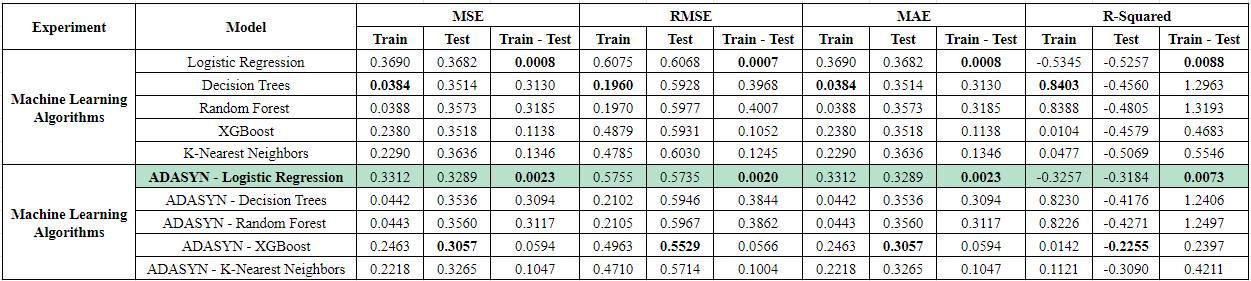

- Although **ADASYN - XGBoost** has the lowest MAE and MSE on the test set, it performs worse than a simple mean predictor, as seen by its negative R² value.
- Among the models with ADASYN applied, **ADASYN - XGBoost** has the greatest R² and appropriate MSE and MAE scores. After ADASYN was applied, the initial model's negative R² improved to -0.2255, which is still negative but shows a better match than any other ADASYN models.
- Although the R² of the **ADASYN - Decision Tree** is higher than that of the **non-ADASYN Decision Tree**, it is still negative, indicating poor generalisation of the model.
- Both with and without ADASYN, **Random Forest**'s R² value is comparatively lower than **Decision Tree**'s. This could be a sign of overfitting in the Random Forest model that ADASYN helped to mitigate.
- In terms of R² on the test set, the non-ADASYN models typically perform badly; negative values denote poor prediction quality.

It may appear that the **ADASYN - XGBoost** has the lowest test set errors if we disregard the R² values, which are unreliable when they are negative, and simply concentrate on MSE, RMSE, and MAE. Alternatively, the **ADASYN - Logistic Regression** is the best when taking into account the evaluation score balance between the test and train sets.

Since balanced evaluation scores between training and test sets are often chosen since they imply a model that would perform reliably in production, we would base our model selection on the word "balance." Consequently, we would select **ADASYN - Logistic Regression** as the optimal machine learning model for the prediction.

【**Conclusion**】 ***ADASYN - Logistic Regression*** would be suitable for the feature importance.

## Check the feature importance to identify main factors affecting the Target Variable

In [146]:
coeff_df = pd.DataFrame(sampled_lr.coef_.flatten(), X_resampled.columns, columns=['Coefficient'])
print(coeff_df)

                  Coefficient
Discount_offered     1.997455
Weight_in_gms       -0.225349


**Discount_offered** has the largest coefficient value </br>
-> this feature might be most influencial on Reach-on-Time factor.

## Conclusion

### **Discount_offered** is the most influential feature that affects on the Shipping Delivery Reach on Time.